In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

TRACKS_PATH = '../data/raw/tracks.csv'
FEATURES_PATH = '../data/raw/features.csv'

print("Biblioteki zaimportowane, ścieżki ustawione.")

Biblioteki zaimportowane, ścieżki ustawione.


In [22]:
def load_fma_dataset():
    print("Wczytywanie tracks.csv...")
    tracks = pd.read_csv(TRACKS_PATH, index_col=0, header=[0, 1])
    
    print("Wczytywanie features.csv (to może chwilę potrwać)...")
    features = pd.read_csv(FEATURES_PATH, index_col=0, header=[0, 1, 2])
    
    return tracks, features

tracks, features = load_fma_dataset()

print("Dane wczytane!")
print(f"Rozmiar tracks: {tracks.shape}")
print(f"Rozmiar features: {features.shape}")

Wczytywanie tracks.csv...
Wczytywanie features.csv (to może chwilę potrwać)...
Dane wczytane!
Rozmiar tracks: (106574, 52)
Rozmiar features: (106574, 518)


In [23]:
print("Liczba utworów w podzbiorach:")
print(tracks['set', 'subset'].value_counts())

small_tracks = tracks[tracks['set', 'subset'] == 'small']
print(f"\nWybrano podzbiór 'small'. Liczba utworów: {len(small_tracks)}")

Liczba utworów w podzbiorach:
(set, subset)
large     81574
medium    17000
small      8000
Name: count, dtype: int64

Wybrano podzbiór 'small'. Liczba utworów: 8000


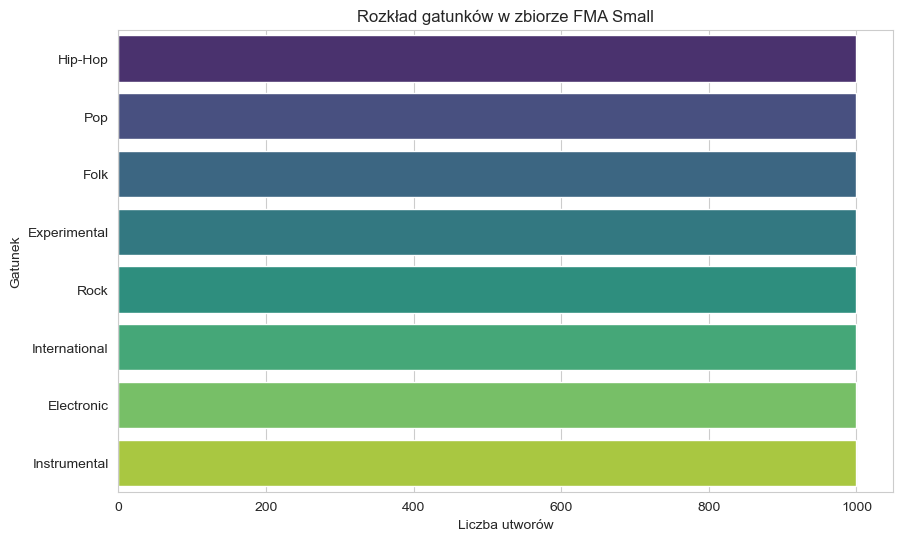

Liczebności gatunków:
(track, genre_top)
Hip-Hop          1000
Pop              1000
Folk             1000
Experimental     1000
Rock             1000
International    1000
Electronic       1000
Instrumental     1000
Name: count, dtype: int64


In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y=small_tracks['track', 'genre_top'],
    hue=small_tracks['track', 'genre_top'],
    order=small_tracks['track', 'genre_top'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title("Rozkład gatunków w zbiorze FMA Small")
plt.xlabel("Liczba utworów")
plt.ylabel("Gatunek")
plt.show()

print("Liczebności gatunków:")
print(small_tracks['track', 'genre_top'].value_counts())

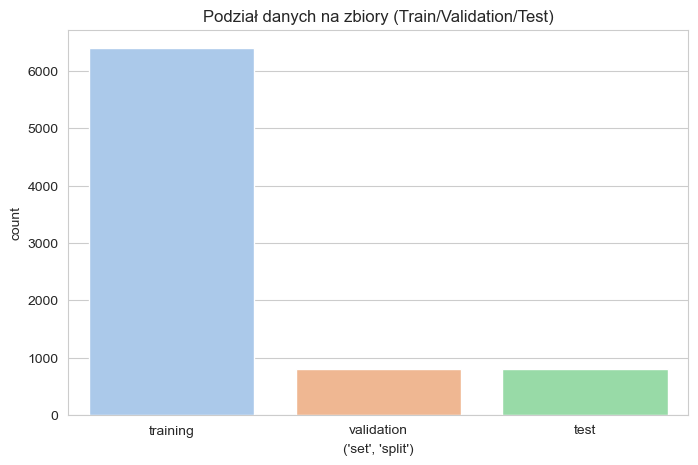

Szczegółowe liczby:
(set, split)
training      6400
validation     800
test           800
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x=small_tracks['set', 'split'],
    hue=small_tracks['set', 'split'],
    palette='pastel',
    legend=False
)
plt.title("Podział danych na zbiory (Train/Validation/Test)")
plt.show()

print("Szczegółowe liczby:")
print(small_tracks['set', 'split'].value_counts())

In [25]:
print("--- Analiza braków danych (NaN) w zbiorze Small ---")
missing_tracks = small_tracks['track', 'genre_top'].isnull().sum()
print(f"Liczba utworów bez gatunku: {missing_tracks}")

small_features = features.loc[small_tracks.index, :].copy()

missing_features = small_features.isnull().sum().sum()
print(f"Liczba brakujących wartości w features.csv: {missing_features}")

--- Analiza braków danych (NaN) w zbiorze Small ---
Liczba utworów bez gatunku: 0
Liczba brakujących wartości w features.csv: 0


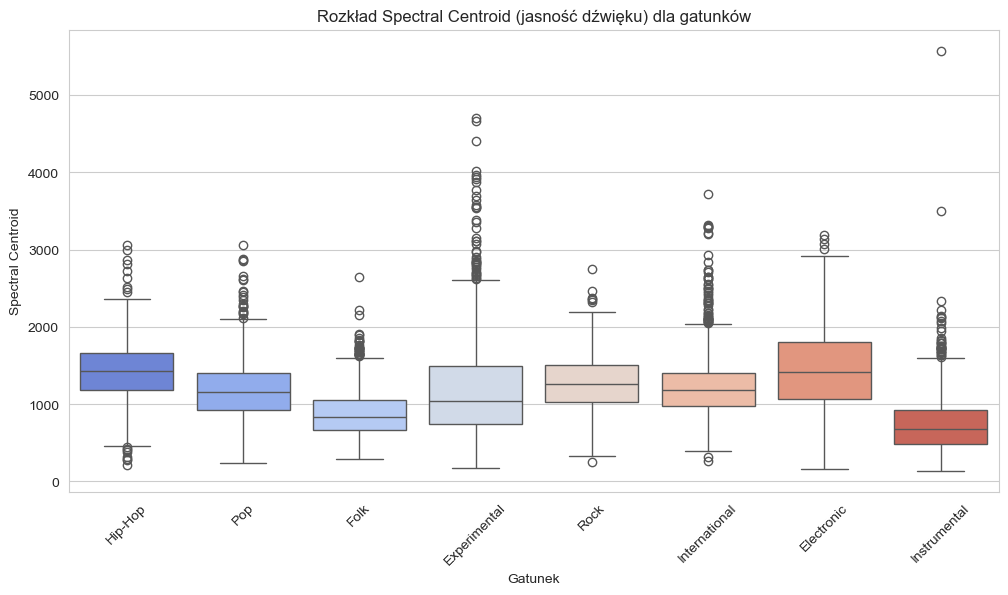

In [28]:
feature_name = ('spectral_centroid', 'mean')

plot_data = pd.DataFrame({
    'Gatunek': small_tracks['track', 'genre_top'],
    'Spectral Centroid': small_features[feature_name].iloc[:, 0]
})

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gatunek', y='Spectral Centroid', data=plot_data, hue='Gatunek', palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title("Rozkład Spectral Centroid (jasność dźwięku) dla gatunków")
plt.show()

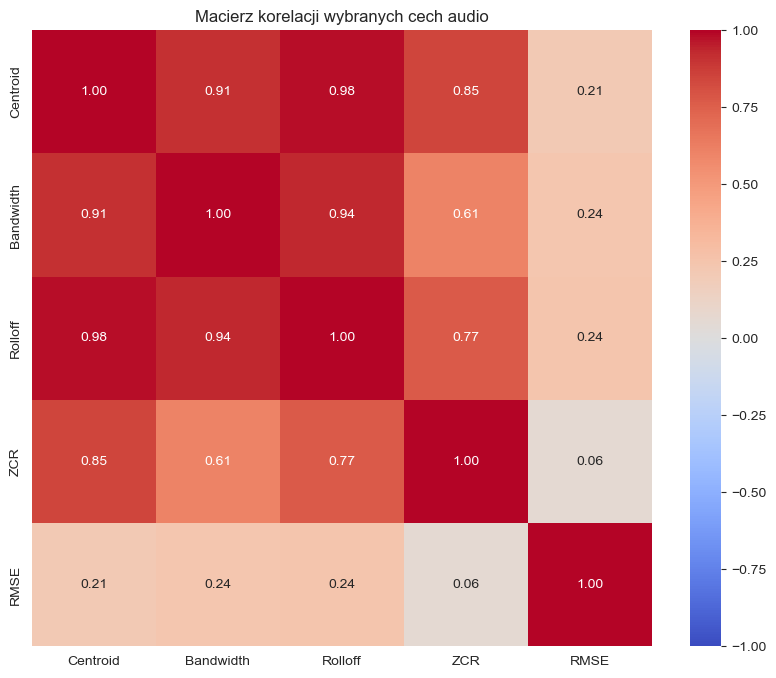

In [27]:
features_map = {
    'Centroid': ('spectral_centroid', 'mean'),
    'Bandwidth': ('spectral_bandwidth', 'mean'),
    'Rolloff': ('spectral_rolloff', 'mean'),
    'ZCR': ('zcr', 'mean'),
    'RMSE': ('rmse', 'mean')
}

data_for_corr = {}

for simple_name, lookup_key in features_map.items():
    data_for_corr[simple_name] = small_features[lookup_key].iloc[:, 0]

corr_data = pd.DataFrame(data_for_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Macierz korelacji wybranych cech audio")
plt.show()